CT-5107 Advanced Topics in Machine Learning & Information Retrieval

Assignment - 1

Implementation of a feed forward neural network


Programming Language Used: Python

Date : 04th March 2019


Team Members:

Name		: Surya Balakrishnan Ramakrishnan 
Student ID	: 18231072
Class		: 1 CSD 1 MSc Computer Science (Data Analytics)

Name		: Sai Krishna Lakshminarayanan
Student ID	: 18230229
Class		: 1 CSD 1 MSc Computer Science (Data Analytics)

Part A
(work by sai krishna)
Overview: 

The task in hand is to design implement and evaluate a feed forward neural network from scratch. We also implemented back propagation in our neural network. We have used the Python programming language and Jupyter Notebook to interpret the python code.

Description of Algorithm:

Feedforward Neural Network:

The feed forward neural nets or otherwise called as the multi-layer perceptron, are the perfect example of a deep learning model. One of the main goals of the feed forward neural networks  is to perform some sort of approximation of the given function. Considering a function which maps an input variable x to a specific category y such that y = f(x) where f is the given function, a feed forward network obtains a mapping m of the category y such that y = (x, ø) such that the obtained result would be the best possible approximation value. As the name suggests neural nets are inspired from our brains, on how our brain processes information. Generally the feedforward neural networks do not have a feedback mechanism, however a feedforward neural network with a feedback mechanism is called as a recurrent neural networks.

Basic Structure of Neural Nets:

Neural nets have 3 main components, an input layer, hidden layer/s (one or more) and an output layer. The nodes of the neural networks may or may not be weighted based on the application. The value of the neuron is either 0 or 1. This particular value is generally based on the case if the weighted sum of all the nodes is greater than the threshold value or the weighted sum is less than the threshold value.



Each of the blue nodes on the left side are input nodes. Since this is a fully connected neural network each of the input nodes are connected to every hidden layer. Then input is passed on to the hidden layer when an activation function checks if the input nodes has a minimum threshold value. If the input value is greater than the threshold value then the neuron is fired. The output is 1 if the neuron was fired else it is 0.
 

(work by surya)
Functions within feedforward neural network:

1)	Cost Function:.

The cost function is responsible mainly for training and solving the model. The cost function quadratic and smooth and it is used to identify how much changes in bias and weights could result in improvement in cost. To minimise the cost we mainly focus on minimising the cost for the quadratic function. is also called logistic function. The sigmoid function is defined as:


Where:	 w is the weight, b denotes the bias, n is the total number of training input cases used to train the model, a is the output vector for the set of input vectors.


2)	Gradient Function:

In neural nets we use a non-linear gradient function, which is responsible for the function to become non convex. In other words the neural nets are trained in an iterative format  by gradient based optimisers, to obtain the best possible outcome.


Where: 
        The change in v1 and v2 is such that change in cost is negative.

We try to fix the size of the movement so that for a fixed small value we try to decrease the cost as much as possible. In other words we try to move a fixed of a fixed size such that we try to find the direction of movement to minimise the cost as much as possible.


3)	Training a neural network:

We use the gradient decent function to find the appropriate weight and bias which would yield the best possible outcome. Initially we initialise these values to a very small value which is close to zero. Then we keep incrementing the value until the error on the training set is minimised.  Another approach to accomplish this is to implement the back propagation algorithm. We fix the cost and weights to a small value initially. When the algorithm has a forward pass the cost for the values is calculated along with the gradient and error. Then the algorithm propagates back to the initial state to fix another value which yields a better result.

Work Split-up:

Student Sai Krishna Lakshminarayanan (18230229) 

Part 1:  Sigmoid, derivative, init, grad forward propagation functions
Part 2 : Confusion matrix for the circle class
Part 3 : Data pre-processing
Part 4 : Confusion matrix for the cat and horse classes
Part 5: Use of Relu softmax and sigmoid functions together
Documentation: Feedforward neural nets, Gradient function, 

Student Surya Balakrishnan Ramakrishnan (18231072) 
Part 1 : Backward Propagation, Train  and Predict  functions
Part 2 : Error vs epoc for the circle class
Part 3 : Tweaking ff and nn function, modification of beta and epoc value.
Part 4 : Error vs epoc plot for cat and horse classes.
Part 5 : Use of ensembles by combining multiple neural nets. 
Documentation: Basic structure of neural nets, Cost function and training a neural net.


In [ ]:
#References
#https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7
#https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c




Now, the feed forward neural network algorithm is initiated.
The algorithm is such that first we define the sigmoid and derivate sigmoid functions and initiate the number of nodes in the hidden layer and input layer.

For this assignment purpose, the hidden layer is 1.

Then the weights are assigned randomly at first and then in the forward propagation and backward propagation, they are reweighted by help of the bias values.

Then the input values are used to train the model and based on which the testing is done.

In [1]:
#loading all the required packages
import pandas as panda
import numpy as num
import math
import seaborn as sea
import matplotlib
import matplotlib.pyplot as plot
import sklearn
import sklearn.datasets
from sklearn import metrics

In [189]:
#this part of work of Sai Krishna
class FFNN():#intiating the class for feed forward neural network
    def sig(self, a): # sigmoid function for the model
        return 1 / (1 + num.exp(-a))#output for the sigmoid function
    def derivativesig(self, a):#function for the derivative of the sigmoid
        #derivative of sigmoid
        return self.sigmoid(a) * (1 - self.sigmoid(a))#output for the derivative sigmoid function
    
    def __init__(self, xtrain, ytrain, xtest, ytest,  beta=0.02, epoch=100, hidlayer = 1, hid_node =4 ):#obtaining the test train data
        #and giving the no of nodes for the hidden and input layer
        self.out_layer = 1#defining the output layer
        self.output = None#initialising the output value for future use
        self.predval = None#initialising the prediction value for future use
        self.hidlayer = hidlayer #storing the value for the hidden layer
        self.hid_node = hid_node #storing the value for number of hidden nodes
        self.beta = beta #storing the beta or the learning rate value
        self.epoch = epoch #storing the epoch value
        self.xtrain = xtrain.as_matrix() # storing the training dataset for x
        self.imp_layer = xtrain.as_matrix().shape[1]#storing the number of nodes in the input layer
        self.ytrain = ytrain # storing the training dataset for y 
        self.xtest = xtest.as_matrix() # storing the testing dataset for x
        self.ytest = ytest.as_matrix()# storing the testing dataset for y
        self.w1 = num.random.randn(self.imp_layer, self.hid_node) # initialising random weights for w1
        self.w2 = num.random.randn(self.hid_node, self.out_layer)# initialising random weights for w2
        self.b1 = num.ones((1, self.hid_node))# initialising random weights for b1
        self.b2 = num.ones((1, self.out_layer))# initialising random weights for b2
    
    def grad(self, d1, d2, tb1, tb2):#initialising the gradient function for the neural network.
        self.w1 = self.w1 - (self.beta*d1)#updating weight of w1 using d1
        self.w2 = self.w2 - (self.beta * d2)#updating weight of w2 using d2
        self.b1 = self.b1 - self.beta*tb1#updating weight of b1 using tb1
        self.b2 = self.b2 - self.beta*tb2#updating weight of b2 using tb2
    #this part of work of Surya    
    def BWprop(self):#initialising the forward backward propagation
        x1 = num.array(self.xtrain)#starting the forward propogation by initialising x1 with values of xtrain
        y1 = num.dot(self.xtrain, self.w1) + self.b1#generating y1 based on xtrain and the weights of w1 and b1
        x2 = self.sig(y1)#taking x2 as the value of the sigmoid function of y1
        y2 = num.dot(x2, self.w2) + self.b2#generating y2 based on x2 and the weights of w2 and b2
        x3 = self.sig(y2)#taking x2 as the value of the sigmoid function of y2
        e = x3 - num.array(self.ytrain).reshape(len(self.ytrain), 1)#updating the error value as the difference between x3 and ytrain
        delta2 = e * x3 * (1-x3)  #delta2 is obtained as the product of error and x3 and (1-x3)
        delta1 = num.dot(delta2,  self.w2.T) * x2 * (1-x2)#initialising the backward propogation by obtaining the delta1 value
        #as the dot product of w2 ,x2 and (1-x2)
        d1 = num.dot(self.xtrain.T, delta1)#d1 is obtained as the dot product of transpose of xtrain and delta1
        tb1 = num.sum(delta1, axis=0).reshape(num.shape(self.b1))#tb1 is obtained as the sum of the delta1 and the b1 reshaped value       
        d2 = num.dot(x2.T, delta2) #d2 is obtained as the dot product of the transpose of T and delta2
        tb2 = num.sum(delta2, axis=0).reshape(num.shape(self.b2))#tb2 is obtained as the sum of delta2 and the reshaped value of b2
        self.grad(d1, d2, tb1, tb2)# readjusting the weights by the help of gradient function                              
       
        return x3, e #returns the values of x3 and e respestively

    def train(self):#initialising the train function to train the data 
        ERR = []#initialising a list for storing the error values
        for i in range(self.epoch):#looping for the range of the epoch
            out, e = self.BWprop()#storing forward and backward propogation results for the dataset in variables out and e
            self.output = out#storing the final output value for publishing later
            RMSE = ((num.sum(e) ** 2)**(1/2))/len(self.ytrain)#obtaining the root mean square error
            ERR.append(RMSE)#storing the values of error

        return ERR

    def Pred(self):#initialising the predict function for predicting the values based on xtest
        x1 = num.array(self.xtest)#storing the values of xtest in x1
        y1 = num.dot(x1, self.w1)#obtaining y1 as the dot product of x1 and weight w1
        x2 = self.sig(y1)#obtaining x2 as the value of the sigmoid function of y1
        y2 = num.dot(x2, self.w2)#getting y2 as the dot product of x2 and weight w2
        x3 = self.sig(y2)#obtaining x3 as the value of the sigmoid function of y2
        self.predval = num.round(x3)#obtaining the predicted value as the rounded value of x3.
#References
#https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7
#https://dzone.com/articles/the-very-basic-introduction-to-feed-forward-neural
#https://stackoverflow.com/questions/52831534/why-is-a-method-of-a-python-class-declared-without-self-and-without-decorators
#https://stackoverflow.com/questions/45264141/convert-array-into-dataframe-in-python
#https://stackoverflow.com/questions/1720421/how-to-concatenate-two-lists-in-python
#Class Lecture Notes

Part B

In this the Neural Network model is applied to the simple dataset of circles500 given.

The code given LoadDataset.ipynb is used for intial purposes of loading the dataset and then it is split into train and test.

In [47]:
#this part of work of Sai Krishna
df = panda.read_csv("circles500.csv")#loading the dataset
y = df['Class'].values#storing y as the label values of class
del df['Class']    #dropping class from the df
X = df.as_matrix() #storing rest of the things as an array


C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [48]:
print ("len(X):", len(X))            # length of outer array
print ("len(X[0]):", len(X[0]))      # length of inner array
print ("len(X[:,0]):", len(X[:,0]))  # length of column 0
(nsamples, nattribs) = num.shape(X) #dimensions of the array
print ("X: nsamples =", nsamples, ", nattribs =", nattribs) #samples and attributes
print ("len(y)", len(y))#length of y
print ("num.shape(y):", num.shape(y))#reshaping y
yt = num.reshape(y, (len(y),1))  #storing it in yt
print ("num.shape(yt):", num.shape(yt))#printing it
(nsamples, nattribs) = num.shape(yt)#obtaining the dimensions
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)#showing the count and attributes

len(X): 500
len(X[0]): 2
len(X[:,0]): 500
X: nsamples = 500 , nattribs = 2
len(y) 500
num.shape(y): (500,)
num.shape(yt): (500, 1)
y transpose: nsamples = 500 , nattribs = 1


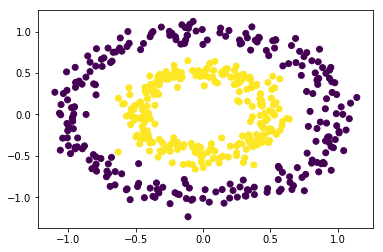

In [49]:
plot.scatter(X[:,0], X[:,1], c=y) #plotting column x[0] vs x[1] column and colouring based on the class values

Now, storing the df as a variable named circle and splitting it into x and y with x as the data values x0 and x1 and y as class

In [66]:
#this part of work of Sai Krishna
circle = df
circle.head()
x = circle[["X0", "X1"]]#storing x as the values of column X0 and X1
y = circle["Class"]#storing y as the values of column class
xtrain = x[1:450]#splitting x into x train y train and x test and y test
ytrain = y[1:450]
xtest = x[451:500]
ytest = y[451:500]

C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


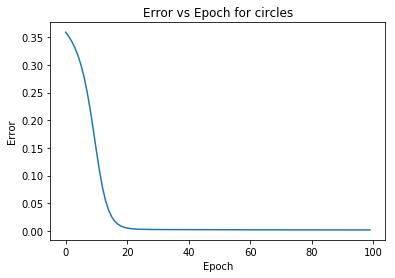

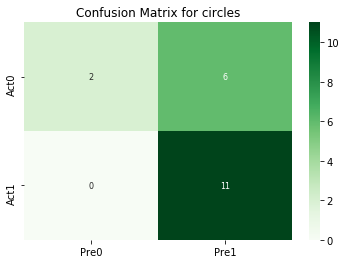

Test Accuracy for Circles is  68.42105263157895


In [194]:
#this part of work of Surya
circleresult = FFNN(xtrain, ytrain, xtest, ytest)#feeding the values into the model
err = circleresult.train()#storing the trained values in a variable
circleresult.Pred()#performing prediction
plot.plot(err)#plotting the trained values
plot.xlabel("Epoch")#giving x label
plot.ylabel("Error")#giving y label
plot.title("Error vs Epoch for circles")#providing the title
plot.show()#showing the obtained plot
#this part of work of Sai Krishna    
axis=plot.axes()#storing the axis values
con_matrix = metrics.confusion_matrix(circleresult.ytest, circleresult.predval, sample_weight=None)
#producing the confusion matrix
con_val = panda.DataFrame(con_matrix, columns = ["Pre0", "Pre1"], index=["Act0", "Act1"])
sea.heatmap(con_val, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Greens', ax=axis)#generating it through heatmap
axis.set_title('Confusion Matrix for circles')#establishing the title
plot.show()#showing the confusion matrix
print('Test Accuracy for Circles is ', (1-num.sum(abs(circleresult.predval - circleresult.ytest.reshape(len(circleresult.ytest), 1)))/len(circleresult.ytest))*100)
#obtaining the accuracy  




Observation

It is observed that for less value of hidden nodes itself the model is giving good accuracy
This is because there are only less input columns
The error is high initially and is reduced as the epoch increases.
There are some false negative values which say that the model weights have to be provided in a better way to fit the positive values correctly.
The overall accuracy is 68.4% and it follows the error vs epoch standard curve to an extent.
In this way the a non linearlly separable dataset is classfied.

Part 3

Loading the dataset by help of the code given for reference in the assignment section

In [59]:
# This function taken from the CIFAR website
#this is work of Sai
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.


In [4]:
def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [5]:
def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plot.imshow(picture)
    plot.show()

In [6]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [7]:
#this is work of Sai
data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print (type(data))
print(data.shape)

names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)


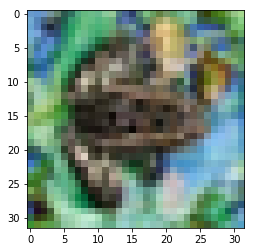

Image 200 : Class is  b'frog'


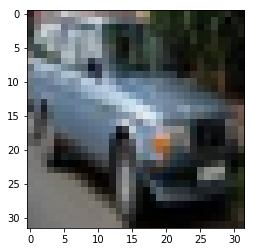

Image 201 : Class is  b'automobile'


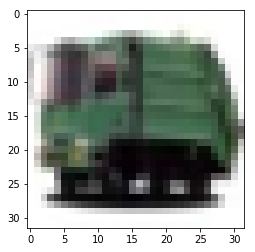

Image 202 : Class is  b'truck'


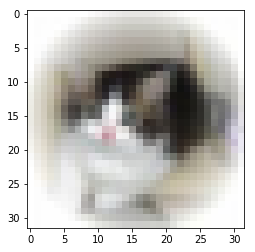

Image 203 : Class is  b'cat'


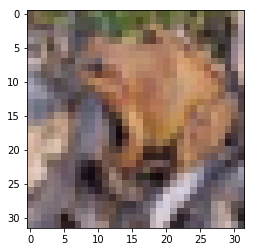

Image 204 : Class is  b'frog'


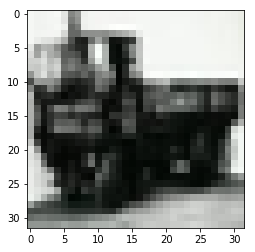

Image 205 : Class is  b'truck'


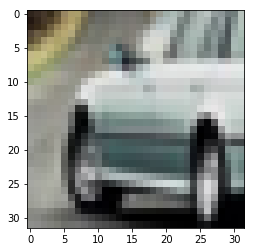

Image 206 : Class is  b'automobile'


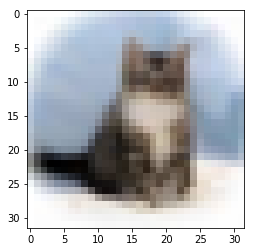

Image 207 : Class is  b'cat'


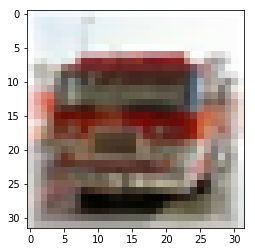

Image 208 : Class is  b'truck'


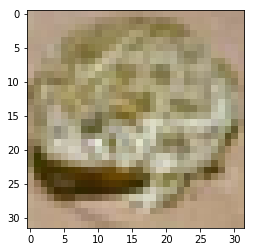

Image 209 : Class is  b'frog'


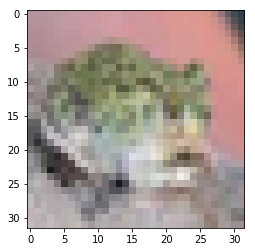

Image 210 : Class is  b'frog'


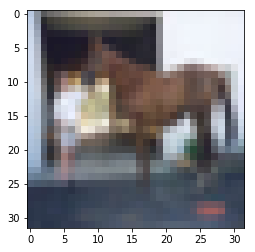

Image 211 : Class is  b'horse'


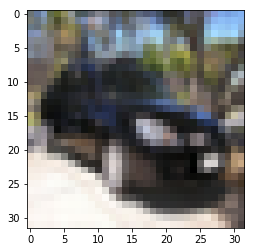

Image 212 : Class is  b'automobile'


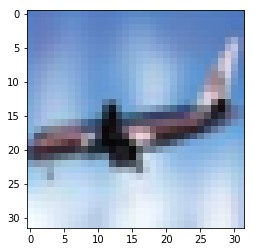

Image 213 : Class is  b'airplane'


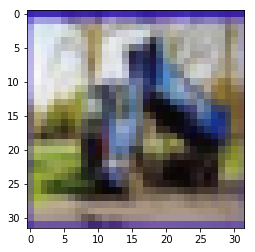

Image 214 : Class is  b'truck'


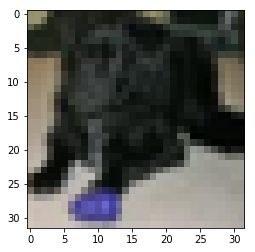

Image 215 : Class is  b'dog'


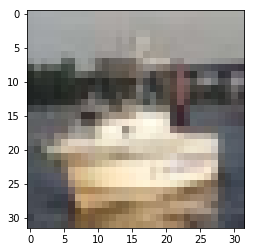

Image 216 : Class is  b'ship'


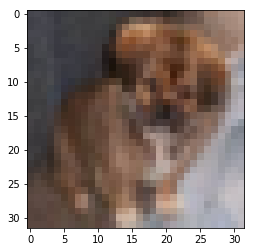

Image 217 : Class is  b'dog'


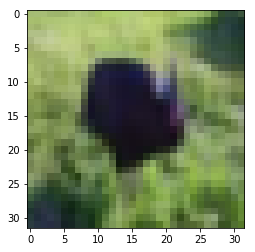

Image 218 : Class is  b'bird'


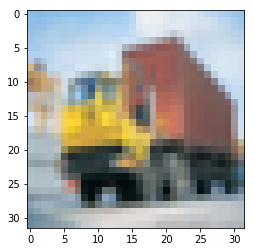

Image 219 : Class is  b'truck'


In [8]:
# Display a few images from the batch
for i in range (200,220):
   visualise(data, i)
   print("Image", i,": Class is ", names[labels[i]])

Now data preprocessing is done by considering y as the value of labels 
a is stored as the location with values where label is 3 which is the value for cat
b is stored as the location with values where label is 7 which is the value for horse
c stores the list of the index of the rows where label is 3
d stores the list of the index of the rows where label is 7
e is the sum of them

In [9]:
#this is work of Sai
y=panda.DataFrame(labels)#storing the class values
a=panda.DataFrame(y.loc[y[0] ==3])#storing values of cat class value 3
b=panda.DataFrame(y.loc[y[0]==7])#storing the values of horse class value 7
c=y.index[y[0] ==3].tolist()#storing index of cat 
d=y.index[y[0]==7].tolist()#storing index of horse
e=c+d# sum
e

[9,
 17,
 21,
 26,
 33,
 36,
 38,
 39,
 59,
 74,
 78,
 80,
 91,
 101,
 141,
 142,
 150,
 159,
 169,
 174,
 197,
 203,
 207,
 229,
 241,
 251,
 253,
 258,
 266,
 287,
 314,
 315,
 331,
 333,
 334,
 342,
 367,
 370,
 377,
 384,
 395,
 416,
 445,
 446,
 476,
 479,
 494,
 517,
 548,
 550,
 583,
 597,
 603,
 618,
 629,
 638,
 639,
 678,
 684,
 685,
 691,
 702,
 717,
 730,
 740,
 774,
 776,
 785,
 788,
 792,
 801,
 805,
 806,
 809,
 845,
 846,
 850,
 857,
 861,
 865,
 869,
 878,
 882,
 895,
 922,
 941,
 949,
 955,
 969,
 992,
 995,
 998,
 1002,
 1010,
 1025,
 1030,
 1041,
 1048,
 1055,
 1057,
 1059,
 1070,
 1074,
 1076,
 1098,
 1100,
 1104,
 1109,
 1120,
 1121,
 1124,
 1127,
 1128,
 1150,
 1160,
 1164,
 1196,
 1202,
 1208,
 1252,
 1257,
 1265,
 1271,
 1281,
 1286,
 1316,
 1321,
 1345,
 1351,
 1358,
 1363,
 1368,
 1405,
 1426,
 1427,
 1449,
 1461,
 1487,
 1496,
 1499,
 1510,
 1511,
 1528,
 1534,
 1539,
 1546,
 1553,
 1554,
 1555,
 1556,
 1568,
 1573,
 1603,
 1608,
 1625,
 1655,
 1658,
 1685,


In [10]:
e=panda.DataFrame(data[c])#values of data corresponding rows to the cat values
f=panda.DataFrame(data[d])#values of data corresponding rows to the horse values
x=panda.concat([e,f],ignore_index=True)#concatinating them to obtain the x
x.head()#sample output

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,125,110,102,106,106,141,175,175,148,106,...,60,62,67,70,75,79,81,82,84,86
1,110,142,151,133,83,55,48,51,51,52,...,86,87,83,81,79,71,67,60,60,62
2,252,249,250,251,251,249,239,248,251,251,...,120,121,117,105,97,117,121,113,109,88
3,131,124,116,124,142,159,171,174,180,184,...,29,18,17,9,5,17,47,69,73,73
4,7,7,5,7,11,11,17,25,18,9,...,123,141,115,110,97,82,82,76,81,119


In [11]:
y=panda.concat([a,b],ignore_index=True)#obtaining y by concatinating the values of cat and horse class labels
y.head()#sample output

,0
0,3
1,3
2,3
3,3
4,3


In [12]:
print(len(x))#length of x
print(len(y))#length of y

2017
2017


In [87]:
xtrain=x[0:100]#splitting to x train and y train and x test and y test
xtest=x[101:120]
ytrain=y[0:100]
ytest=y[101:120]

In [176]:
#this is work of Sai
class FFNN():#intiating the class for feed forward neural network
    def sig(self, a): # sigmoid function for the model
        return 1 / (1 + num.exp(-a))#output for the sigmoid function
    def derivativesig(self, a):#function for the derivative of the sigmoid
        #derivative of sigmoid
        return self.sigmoid(a) * (1 - self.sigmoid(a))#output for the derivative sigmoid function
    
    def __init__(self, xtrain, ytrain, xtest, ytest,  beta=0.02, epoch=50, hidlayer = 1, hid_node =400 ):#obtaining the test train data
        #and giving the no of nodes for the hidden and input layer
        self.out_layer = 1#defining the output layer
        self.output = None#initialising the output value for future use
        self.predval = None#initialising the prediction value for future use
        self.hidlayer = hidlayer #storing the value for the hidden layer
        self.hid_node = hid_node #storing the value for number of hidden nodes
        self.beta = beta #storing the beta or the learning rate value
        self.epoch = epoch #storing the epoch value
        self.xtrain = xtrain.as_matrix() # storing the training dataset for x
        self.imp_layer = xtrain.as_matrix().shape[1]#storing the number of nodes in the input layer
        self.ytrain = ytrain # storing the training dataset for y 
        self.xtest = xtest.as_matrix() # storing the testing dataset for x
        self.ytest = ytest.as_matrix()# storing the testing dataset for y
        self.w1 = num.random.randn(self.imp_layer, self.hid_node) # initialising random weights for w1
        self.w2 = num.random.randn(self.hid_node, self.out_layer)# initialising random weights for w2
        self.b1 = num.ones((1, self.hid_node))# initialising random weights for b1
        self.b2 = num.ones((1, self.out_layer))# initialising random weights for b2
    
    def grad(self, d1, d2, tb1, tb2):#initialising the gradient function for the neural network.
        self.w1 = self.w1 - (self.beta*d1)#updating weight of w1 using d1
        self.w2 = self.w2 - (self.beta * d2)#updating weight of w2 using d2
        self.b1 = self.b1 - self.beta*tb1#updating weight of b1 using tb1
        self.b2 = self.b2 - self.beta*tb2#updating weight of b2 using tb2
   #this part of work of Surya     
    def BWprop(self):#initialising the forward backward propagation
        x1 = num.array(self.xtrain)#starting the forward propogation by initialising x1 with values of xtrain
        y1 = num.dot(self.xtrain, self.w1) + self.b1#generating y1 based on xtrain and the weights of w1 and b1
        x2 = self.sig(y1)#taking x2 as the value of the sigmoid function of y1
        y2 = num.dot(x2, self.w2) + self.b2#generating y2 based on x2 and the weights of w2 and b2
        x3 = self.sig(y2)#taking x2 as the value of the sigmoid function of y2
        e = x3 - num.array(self.ytrain).reshape(len(self.ytrain), 1)#updating the error value as the difference between x3 and ytrain
        delta2 = e * x3 * (1-x3)  #delta2 is obtained as the product of error and x3 and (1-x3)
        delta1 = num.dot(delta2,  self.w2.T) * x2 * (1-x2)#initialising the backward propogation by obtaining the delta1 value
        #as the dot product of w2 ,x2 and (1-x2)
        d1 = num.dot(self.xtrain.T, delta1)#d1 is obtained as the dot product of transpose of xtrain and delta1
        tb1 = num.sum(delta1, axis=0).reshape(num.shape(self.b1))#tb1 is obtained as the sum of the delta1 and the b1 reshaped value       
        d2 = num.dot(x2.T, delta2) #d2 is obtained as the dot product of the transpose of T and delta2
        tb2 = num.sum(delta2, axis=0).reshape(num.shape(self.b2))#tb2 is obtained as the sum of delta2 and the reshaped value of b2
        self.grad(d1, d2, tb1, tb2)# readjusting the weights by the help of gradient function                              
       
        return x3, e #returns the values of x3 and e respestively

    def train(self):#initialising the train function to train the data 
        ERR = []#initialising a list for storing the error values
        for i in range(self.epoch):#looping for the range of the epoch
            out, e = self.BWprop()#storing forward and backward propogation results for the dataset in variables out and e
            self.output = out#storing the final output value for publishing later
            RMSE = ((num.sum(e) ** 2)**(1/2))/len(self.ytrain)#obtaining the root mean square error
            ERR.append(RMSE)#storing the values of error

        return ERR

    def Pred(self):#initialising the predict function for predicting the values based on xtest
        x1 = num.array(self.xtest)#storing the values of xtest in x1
        y1 = num.dot(x1, self.w1)#obtaining y1 as the dot product of x1 and weight w1
        x2 = self.sig(y1)#obtaining x2 as the value of the sigmoid function of y1
        y2 = num.dot(x2, self.w2)#getting y2 as the dot product of x2 and weight w2
        x3 = self.sig(y2)#obtaining x3 as the value of the sigmoid function of y2
        self.predval = num.round(x3)#obtaining the predicted value as the rounded value of x3.

C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\sayei\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


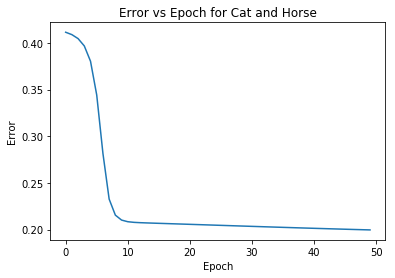

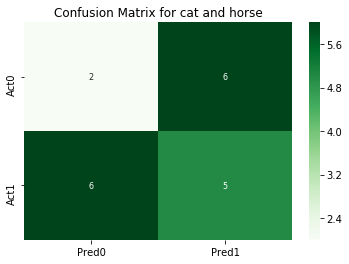

Test Accuracy for Cat and Horse is  36.8421052631579


In [185]:
#this part of work of Surya
cathorse = FFNN(xtrain, ytrain, xtest, ytest)#feeding the values into the model
err = cathorse.train()#storing the trained values in a variable
cathorse.Pred()#performing prediction
plot.plot(err)#plotting the trained values
plot.xlabel("Epoch")#giving x label
plot.ylabel("Error")#giving y label
plot.title("Error vs Epoch for Cat and Horse")#providing the title
plot.show()#showing the obtained plot
#this is work of Sai
axis=plot.axes()#storing the axis values
con_matrix = metrics.confusion_matrix(cathorse.ytest, cathorse.predval, sample_weight=None)
#producing the confusion matrix
con_val = panda.DataFrame(con_matrix, columns = ["Pre0", "Pre1"], index=["Act0", "Act1"])
sea.heatmap(con_val, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Greens', ax=axis)#generating it through heatmap
axis.set_title('Confusion Matrix for cat and horse')#establishing the title
plot.show()#showing the confusion matrix
print('Test Accuracy for Cat and Horse is ', (1-num.sum(abs(cathorse.predval - cathorse.ytest.reshape(len(cathorse.ytest), 1)))/len(cathorse.ytest))*100)
#obtaining the accuracy  

Observation
It is seen that large number of hidden nodes needed for proper functioniong of the model
It takes alot of time to process due to several columns in x and therefore epoch is kept low for getting reasonable output
The error vs epoch curve seems to be following the conventional way
The error values are high at the start and reduced gradually
There are several false positive and negative values present which means that the class horse and cat are wrongly classified alot of times and hence the lower accuracy
Therefore, weights are to be rearranged properly with proper nodes inorder to improve the accuracy.

Part 5

Both of us were unable to implement the improvement due to lack of time and hence submitting only the theoritical concept of the improvement that could have been implemented to the model.

Work by Sai Krishna

Implementation using ReLU:
The basic architecture involves creating a feed forward network with 2 hidden layers, where all the hidden layers will have 3 neurons. The first and the second hidden layers have the relu and sigmoid functions respectively as activation functions. The final layer has the softmax function. Once the algorithm has a forward pass the error is calculated using the cross entropy method. Usually, this particular  method is applied for each element in such a way that we get the output required of other function, such that it is like a product of matrix-vector. In the usage of MLP , we utilise the individual rectifier units with which we replace other activation functions used We can also mix-and-match the different layers based on our choice. One of the several ways ReLUs  can immensely help us to improve the neural nets is by increasing the speed of  the process of  training the model. The gradient computation is a very simple step such  that the obtained value is either 0 or 1 depending on the sign of the input. Also, if we consider the computational step of a ReLU  it is comparatively easy because of the fact that  any negative elements which have been set to 0.0 such that none of the exponentials, or none of the multiplicative or division operations could affect the outcome. Logistic gradient and the corresponding hyperbolic tangent networks are generally smaller than the corresponding positive portions of the ReLU. This signifies the fact that the positive portion of ReLU is updated more rapidly as training  of the model progresses.

Work by Surya Balakrishnan
Implementation usingEnsemble

One of the improvements which could be used to improve the performance of the neural nets algorithm is by the use of ensemble of algorithm. As an individual neural networks are not very accurate such that it could be deemed suitable. In this particular methodology we implement several methods of implementations of neural nets and we can use their combined predictive power. In other words, we can use different predictive models to work together combining the predictions from several models which adds a bias which can help us to encounter the problem of variability. We choose several different architectures of neural networks and we train the dataset on all of them or on different parts of the training datasets and then we ensemble them to use the collective predictive power to obtain improved accuracy scores. We can use the Pearson correlation between different individual classifiers to get the accuracy scores. Then we can choose the n best algorithms that produce the desired outputs, in this way the accuracy of the algorithm could be improved. However there are some general practices which needs to be followed among them we try to keep the ensemble small as it requires high computational resources. It is also better to choose different mathematical models as activation functions for ensembles so that we don’t end up with two similar algorithms doing the same task. We can also implement the k fold cross validation to repeat the process up to a fixed number of times to get a more accurate score. Alternatively we can use bootstrapping or bootstrap bagging ensemble to achieve the same.

References
https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7
https://dzone.com/articles/the-very-basic-introduction-to-feed-forward-neural
https://stackoverflow.com/questions/52831534/why-is-a-method-of-a-python-class-declared-without-self-and-without-decorators
https://stackoverflow.com/questions/45264141/convert-array-into-dataframe-in-python
https://stackoverflow.com/questions/1720421/how-to-concatenate-two-lists-in-python
https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it